# 1957 Yılından İtibaren Gerçekleştirilmiş Uzay Görevleri Veri Setinin Analizi ve Görselleştirilmesi

Bu çalışmada **https://www.kaggle.com/datasets/agirlcoding/all-space-missions-from-1957** linkinde yer alan veri setini kullanarak özellik (feature) analizi yapacağız ve verileri görselleştireceğiz (visualization). Veri setinin detayları için **https://nextspaceflight.com/launches/past/?page=1** sitesini ziyaret edebilirsiniz.

Dilerseniz veri setimizde yer alan sütunların neyi temsil ettiklerine bir bakalım,
- **Company Name:** Şirket isimlerini temsil ediyor
- **Location:** Fırlatılışın nereden yapıldığını temsil ediyor
- **Datum:** Fırlatma tarihini temsil ediyor
- **Detail:** Roket isimlerini temsil ediyor
- **Status Rocket:** Gerçekleştirilen görevin devam edip etmediğini temsil ediyor
- **Rocket:** Projenin Fiyatını temsil ediyor
- **Status Mission:** Fırlatmanın başarılı olup olmadığını temsil ediyor

### Kütüphanelerin Yüklenmesi

In [334]:
import numpy as np # Çeşitli hesaplamaları gerçekleştirmek için kullanacağız
import pandas as pd # Veriyi içeri aktarmak ve işlemek için kullanacağız
import seaborn as sns # Veri görselleştirmesi (visualization) için kullanacağız
import matplotlib.pyplot as plt # Veri görselleştirme sırasında çeşitli yazılar eklemek için kullanacağız
import plotly.express as px # İnteraktif grafikler oluşturmak için kullanacağız
import plotly.graph_objects as go # İnteraktif grafikler oluşturmak için kullanacağız
from plotly.subplots import make_subplots # Altgrafikler oluşturmak için kullanacağız
from sklearn.preprocessing import LabelEncoder # Kategorik verileri nümerik hale getirmek için kullanacağız

import warnings
warnings.filterwarnings("ignore")

### Analiz ve Görselleştirme

In [336]:
df = pd.read_excel("data_of_space_missions.xlsx")
df.head()

,Column1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,500.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,2975.0,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,650.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,1450.0,Success


In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Column1         4324 non-null   int64  
 1   Unnamed: 0      4324 non-null   int64  
 2   Company Name    4324 non-null   object 
 3   Location        4324 non-null   object 
 4   Datum           4324 non-null   object 
 5   Detail          4324 non-null   object 
 6   Status Rocket   4324 non-null   object 
 7    Rocket         949 non-null    float64
 8   Status Mission  4324 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 304.2+ KB


- **info()->** pandas kütüphanesine ait olan bu metod ile verimizdeki sütunlara ait özellikleri görebiliyoruz. 6 object sınıfımız 2 Integer ve 1 adet Float sınıfımız bulunmakta. 
- Veri setimizi incelediğimizde ilk gözümüze çarpan nokta gereksiz sütunlardır. **"Column1"** ve **"Unnamed: 0"** isimli iki sütunun diğer sütunlarla gözle görülür bir ilşikisi olduğu söylenemez. Dolayısıyla bu iki sütunu çıkarabiliriz.
- Bir diğer gözümüze çarpan nokta ise **nümerik verilere çevirebileceğimiz kategorik verilerin varlığıdır.** Veri setimizdeki değerleri kategorik verilerden nümerik verilere çevirmek hem ML uygulamalarında önemli bir adımdır.

In [339]:
df = df.drop(["Column1", "Unnamed: 0"], axis=1)

**drop()->** veri setimizde çıkarmak istediğimiz kategoriler için kullandığımız bir metoddur. **drop("çıkarılacak sütun ismi" veya [çıkarılacak sütunların listesi], axis=0 veya 1)** Burada axis değeri çıkarma işleminin sütun (axis=1) bazında mı yoksa satır (axis=0) bazında mı olacağını ifade etmektedir.

In [341]:
unique_values = df["Company Name"].unique() # Sütundaki eşşiz değerleri "unique_values" değişkenine attık
print(f"Kaç farklı şirket fırlatma gerçekleştirdi: {len(unique_values)}") # Kaç farklı şirketin olduğuna baktık

Kaç farklı şirket fırlatma gerçekleştirdi: 56


In [342]:
company_ds = df["Company Name"].value_counts().reset_index().loc[:27] # En az ve daha fazla roket gönderen ülkeler
company_ds

,Company Name,count
0,RVSN USSR,1777
1,Arianespace,279
2,CASC,251
3,General Dynamics,251
4,NASA,203
5,VKS RF,201
6,US Air Force,161
7,ULA,140
8,Boeing,136
9,Martin Marietta,114


- **value_counts()->** belirttiğimiz sütundaki aynı isimlerin kaç kez geçtiğinin bir listesini çıkarır.
- **reset_index()->** listenin indexini sıfırlar ve yeni indexler atayarak yeni bir DataFrame oluşturur.
- **loc[:]->** pandas'ta bir DataFrame'den satırları veya sütunları seçmek için kullanılan bir fonksiyondur.

Şimdi bu analizimizi görselleştirelim.

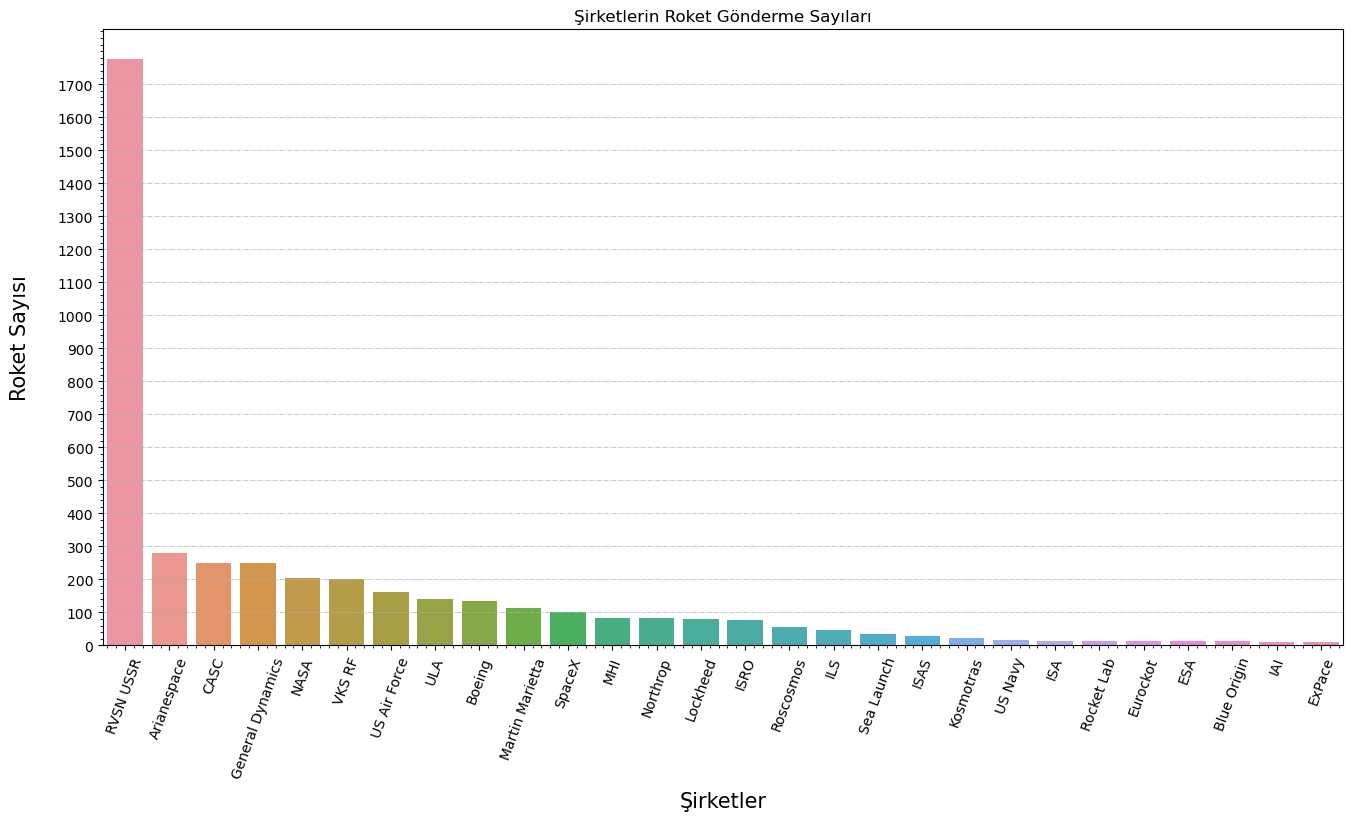

In [344]:
plt.figure(figsize=(16, 8))
sns.barplot(x=company_ds["Company Name"], y=company_ds["count"], data = company_ds)
plt.title("Şirketlerin Roket Gönderme Sayıları")
plt.xlabel("Şirketler", fontsize=15, color = "black", labelpad=8)
plt.ylabel("Roket Sayısı", fontsize=15, color = "black", labelpad=20)
plt.xticks(rotation=70)
plt.yticks(range(0,1800,100))
plt.grid(axis='y', linestyle="-.", linewidth=0.5)
plt.minorticks_on()  
plt.show()

In [345]:
# Alternatif bir yöntem daha
figure = go.Figure(go.Bar(x = company_ds["Company Name"], y = company_ds["count"]))
figure.update_layout(title="Şirketlerin Roket Gönderme Sayıları", xaxis_title="Şirketler", yaxis_title="Roket Sayısı")
figure.show()

In [346]:
status_ds = df["Status Rocket"].value_counts().reset_index()
status_ds

,Status Rocket,count
0,StatusRetired,3534
1,StatusActive,790


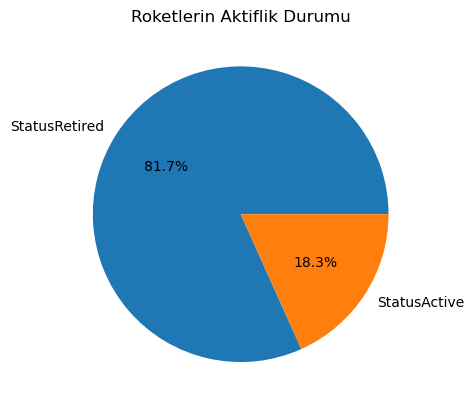

In [347]:
# Pasta grafiğini kullanarak aktif ve inaktif roketlere göz atalım
plt.pie(x=status_ds["count"], labels= status_ds["Status Rocket"], autopct="%.1f%%")
plt.title("Roketlerin Aktiflik Durumu");

In [348]:
# Alternatif bir yöntem (daha estetik)
figure= px.pie(status_ds, values= "count", names= "Status Rocket", title="Roketlerin Aktiflik Durumu")
figure.show()

In [349]:
mission_ds = df["Status Mission"].value_counts().reset_index() 
mission_ds

,Status Mission,count
0,Success,3879
1,Failure,339
2,Partial Failure,102
3,Prelaunch Failure,4


In [350]:
# Status Mission sütunun görselleştirilmesi
figure = px.bar(mission_ds, x="Status Mission", y="count", title="Başarı Durumları")
figure.show()

**Roket Durumu ile Maliyetlerinin Karşılaştırılması**

In [352]:
np.sum(pd.isna(df[" Rocket"])) # Rocket sütununda boşlukların olup olmadığına bakalım

3375

In [353]:
df_ = df.dropna(subset=[" Rocket"], axis="rows")
np.sum(pd.isna(df_[" Rocket"]))

0

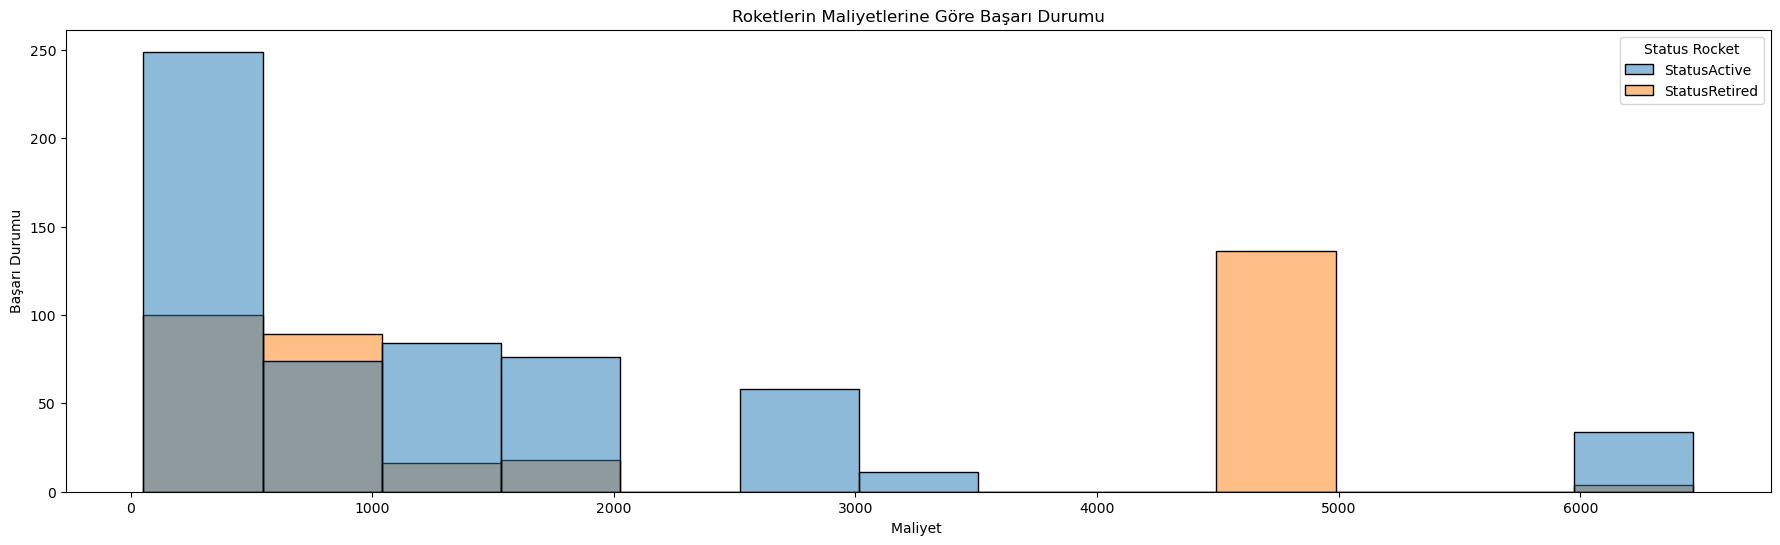

In [354]:
plt.figure(figsize=(22,6))
sns.histplot(x=" Rocket", hue= "Status Rocket", data=df_)
plt.title("Roketlerin Maliyetlerine Göre Başarı Durumu")
plt.xlabel("Maliyet ")
plt.ylabel("Başarı Durumu")
plt.show()

Ortaya çıkan grafikten düşük maliyetli roketlerin kullanılabilirliğinin az olduğunu görebiliyoruz. Hatta düşük maliyetli roketlerin yarısına yakını artık emekli olmuş fakat maliyet arttıkça aynı şekilde roketlerin kullanılabilirliği de doğru orantılı olarak artmakta.

**Roketlerin Başarımı ile Maliyetlerinin Karşılaştırılması**

In [357]:
np.sum(pd.isna(df["Status Mission"])) # Status mission sütununda boş bir değer varsa kaldıralım yoksa devam edelim

0

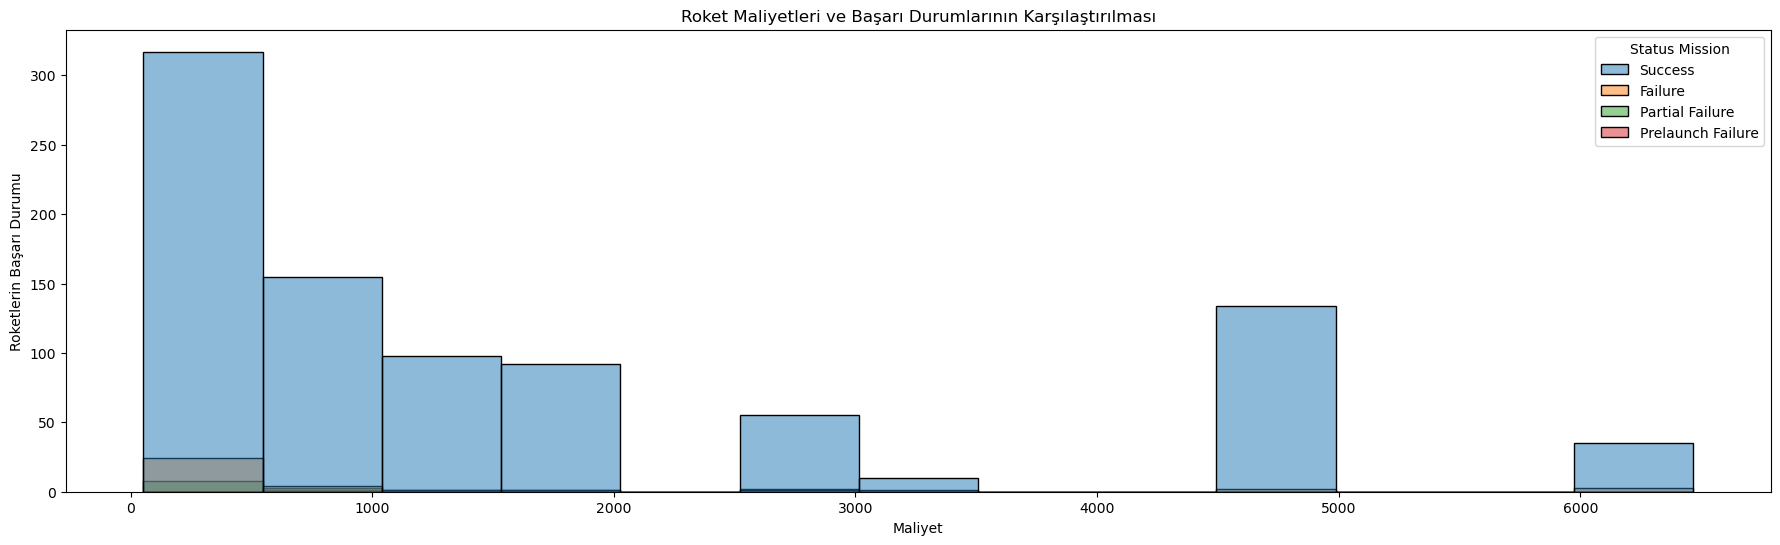

In [358]:
plt.figure(figsize=(22,6))
sns.histplot(data=df_, x=" Rocket", hue="Status Mission")
plt.title("Roket Maliyetleri ve Başarı Durumlarının Karşılaştırılması")
plt.xlabel("Maliyet")
plt.ylabel("Roketlerin Başarı Durumu")
plt.show()

Maliyetin az olması başarı durumunu roketlerin kullanılabilirliğinin aksine çok etkilemiyor gibi duruyor. Tabi ki de düşük maliyetli üretilen roketlerde, başarısız görevlerin sayısında fazlalık var fakat bu, roketlerin kullanım sürelerindeki kadar kuvvetli bir ilişki olarak gözlemlenmemekte.

**Şirketlerin Harcadığı Toplam Maliyet**

In [361]:
group_company_ds = df_.groupby(["Company Name"])[" Rocket"].sum().reset_index() 

- **df_.groupby(["Company Name"])[" Rocket"].sum()** kodu açıklayacak olursak,
groupby()-> Veri çerçevesini belirtilen sütuna göre gruplar.
groupby işleminden sonra " Rocket" sütununa odaklanır. Burada dikkat edilmesi gereken şey: " Rocket" sütununda sayısal veriler olması gerekir (örneğin maliyet veya adet gibi değerler).

Yani groupby ile gruplandırdıktan sonra hangi sütunun verilerini işlemek istiyorsak onu seçiyoruz. En son ise bu değerleri sum() fonksiyonu ile topluyoruz.

In [363]:
group_company_ds = group_company_ds.sort_values(by=[" Rocket"], ascending = False) # Büyükten küçüğe doğru sıralayalım
# ascending = False ifadesi True olursa-> Küçükten büyüğe False olursa -> Büyükten küçüğe sıralar

In [364]:
figure=go.Figure(go.Bar(x = group_company_ds["Company Name"], y = group_company_ds[" Rocket"]))
figure.update_layout(title="Şirketlerin Toplam Maliyeti", xaxis_title="Şirketler", yaxis_title="Toplam Maliyet")
figure.show()

**Hangi Yıllarda Rekabet Artmış Hangi Yıllarda Azalmış?**

Yıllara göre analizi gerçekleştireceğimiz için pandas'ın dateframe veri tipi ile çalışmamız gerekiyor.

In [367]:
df["Date"]=pd.to_datetime(df["Datum"], format='mixed')
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Date
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,500.0,Success,2020-08-07 05:12:00+00:00
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,2975.0,Success,2020-08-06 04:01:00+00:00
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,650.0,Success,2020-07-30 21:25:00+00:00
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,1450.0,Success,2020-07-30 11:50:00+00:00


**to_datetime()->** veri setimizin tarih sütunundaki tarihleri kolayca işleyebileceğimiz ve içerisinden seneleri çekebileceğimiz date frame yapısına dönüştürüyor. fonksiyon içerisinde kullandığımız "format" ise sütunumuzdaki tarih verilerimizin karışık türlerde bulunduğunu ve buna göre işlem yapılması gerektiğini ifade ediyor, sizin veri setinizde tarihler aynı tür ise bunu kullanmayabilirsiniz.

In [369]:
df["Year"] = df["Date"].apply(lambda datetime: datetime.year)
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Date,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,500.0,Success,2020-08-07 05:12:00+00:00,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,2975.0,Success,2020-08-06 04:01:00+00:00,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,650.0,Success,2020-07-30 21:25:00+00:00,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,1450.0,Success,2020-07-30 11:50:00+00:00,2020


Pandas DataFrame'inde "Date" sütunundaki her bir datetime değerinin yıl kısmını çıkardık. apply() fonksiyonu, sütundaki her elemana sırayla **lambda fonksiyonunu** uygulayarak datetime.year değerini alır ve sonuçları "Year" adında yeni bir sütuna atar.

- **apply->** df["Date"] sütunundaki her bir hücreye bu işlemin yapılacağını belirtir, yani her bir hücreye lambda foksiyonunu uygular.
- **lambda->** Python'da tek satırlık anonim (isimsiz) bir fonksiyon tanımlama yöntemidir.

In [371]:
year_ds = df["Year"].value_counts().reset_index()
year_ds

,Year,count
0,1971,119
1,2018,117
2,1977,114
3,1975,113
4,1976,113
...,...,...
59,2010,37
60,2005,37
61,1958,28
62,1959,20


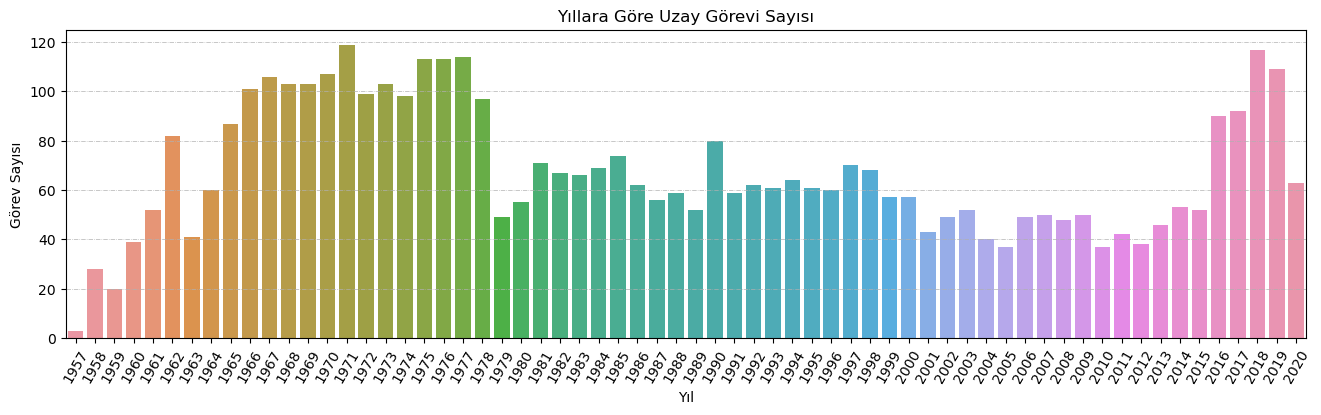

In [372]:
# Seaborn ile görselleştirme
plt.figure(figsize=(16,4))
sns.barplot(x=year_ds["Year"], y=year_ds["count"], data=year_ds)
plt.title("Yıllara Göre Uzay Görevi Sayısı")
plt.xlabel("Yıl")
plt.ylabel("Görev Sayısı")
plt.xticks(rotation=60)
plt.grid(axis='y', linestyle="-.", linewidth=0.5)
plt.show()

In [373]:
# Alternatif
figure = go.Figure(go.Bar(x=year_ds["Year"], y=year_ds["count"]))
figure.update_layout(xaxis_title="Yıllar", yaxis_title="Görev Sayısı", title="Yıllara Göre Uzay Görevi Sayısı")
figure.show()

**Ülkelerin Görev Başarım Durumları**

In [375]:
encoder = LabelEncoder()
encoder.fit(df["Status Mission"])

LabelEncoder()

In [376]:
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Date,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,500.0,Success,2020-08-07 05:12:00+00:00,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,2975.0,Success,2020-08-06 04:01:00+00:00,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,650.0,Success,2020-07-30 21:25:00+00:00,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,1450.0,Success,2020-07-30 11:50:00+00:00,2020


In [377]:
# Oluşturacağımız tabloda kullanmak üzere renkler belirleyelim
colors={
    0: "Red",
    1: "Orange",
    2: "Yellow",
    3: "Green"
}

In [378]:
# Location sütunundaki ülke bilgisini ayrı bir sütuna geçiriyoruz
countries_dict = {
    'Russia' : 'Russian Federation',
    'New Mexico' : 'USA',
    "Yellow Sea": 'China',
    "Shahrud Missile Test Site": "Iran",
    "Pacific Missile Range Facility": 'USA',
    "Barents Sea": 'Russian Federation',
    "Gran Canaria": 'USA'
}
df["Country"] = df["Location"].str.split(", ").str[-1].replace(countries_dict)
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Date,Year,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,500.0,Success,2020-08-07 05:12:00+00:00,2020,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,2975.0,Success,2020-08-06 04:01:00+00:00,2020,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,650.0,Success,2020-07-30 21:25:00+00:00,2020,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,1450.0,Success,2020-07-30 11:50:00+00:00,2020,USA


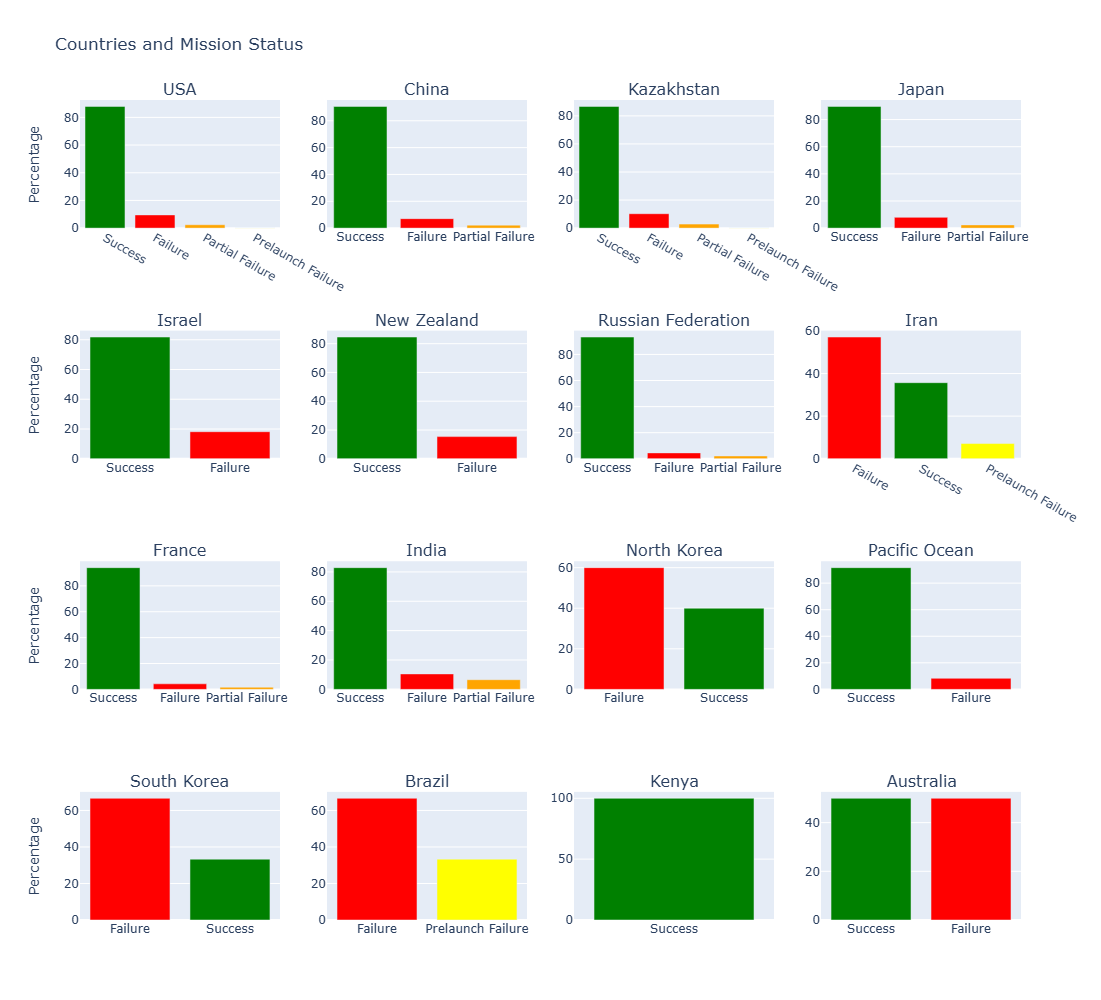

In [421]:
# 4x4'luk alt grafikler oluşturuluyor ve her bir grafiğe başlık olarak "Country" (ülke) isimleri atanıyor
figure = make_subplots(
    rows=4, 
    cols=4, 
    subplot_titles=df["Country"].unique()  # Ülke isimlerinin benzersiz değerleri başlık olarak kullanılacak
)

# Tüm ülkeler üzerinde döngü oluşturuluyor
for i, country in enumerate(df["Country"].unique()):
    # Belirli bir ülkeye ait görev durumlarının yüzdesel dağılımı hesaplanıyor
    counts = df[df["Country"] == country]["Status Mission"].value_counts(normalize=True) * 100
    # Görev durumlarına göre renkler belirleniyor
    color = [colors[x] for x in encoder.transform(counts.index)]  # colors sözlüğünden görev durumuna uygun renk seçiliyor
    
    # Ülke için bir bar (çubuk) grafiği oluşturuluyor
    trace = go.Bar(
        x=counts.index,         # X ekseni: Görev durumlarının isimleri ("Success", "Failure" gibi)
        y=counts.values,        # Y ekseni: Yüzdesel değerler
        name=country,           # Grafiğin ismi (ülke ismi)
        marker={"color": color},# Görev durumuna göre renkler atanıyor
        showlegend=False        # Göstergeyi kapat (legend yalnızca tek bir kez gösterilecek)
    )
    
    # Bar grafiği, 4x4'lük grid üzerinde doğru satır ve sütuna ekleniyor
    figure.add_trace(
        trace, 
        row=(i // 4) + 1,  # Satır numarası: Her 4 ülke için bir sonraki satıra geç
        col=(i % 4) + 1    # Sütun numarası: 4 sütunlu grid üzerinde ilerle
    )

# Grafik düzeni ve görünümü güncelleniyor
figure.update_layout(
    title={"text": "Countries and Mission Status"},  # Ana başlık ekleniyor
    height=1000,  # Grafiğin yüksekliği
    width=1100    # Grafiğin genişliği
)

# Y ekseni başlıklarını ayarlamak için döngü
for i in range(1, 5):  # 1'den 4'e kadar olan satır numaraları
    figure.update_yaxes(
        title_text="Percentage",  # Y ekseni etiketi "Percentage" olarak ayarlanıyor
        row=i,                    # Hangi satıra uygulanacağı belirtiliyor
        col=1                     # Sadece ilk sütundaki grafikler için uygulanıyor
    )

figure.show()

**Korelasyon Analizi**

Korelasyon analizi, iki veya daha fazla değişken arasındaki doğrusal ilişkinin yönünü ve derecesini ölçmek için kullanılan bir istatistiksel tekniktir. Yani iki değişkenin birlikte nasıl değiştiğini anlamamızı sağlar. Korelasyon değeri -1 ile 1 arasında değişmektedir. Negatif korelasyon öznitelikler (features) arasında ters orantı olduğunu ifade ederken pozitif korelasyon doğru orantı olduğunu ifade etmektedir. Korelasyonun gücü ise sayının büyüklüğü ile ilgilidir. Peki korelasyonun gücü nedir? Korelasyonun gücü ya da kuvveti, aralarındaki ilişinin ne kadar güçlü olduğunu ifade etmektedir. İki öznitelik arasındaki korelasyonun değeri 1 ise bu iki değişkeninde aynı yapıya ait olduğunu ve biri arttığı zaman aynı diğerinin de çok benzer şekilde arttığını ifade etmektedir. Bu örneğin benzerini -1 korelasyon sonucunda da düşünebiliriz, bu sefer ise iki öznitelik arasında ters orantılı olacak şekilde çok güçlü bir ilişki vardır. 0 korelasyon ise ilişki olmadığını belirtmektedir. Farklı korelasyon türleri olsa da en sık kullanılan **Pearson Korelasyonu** olarak bilinmektedir. Pearson korelasyonu, değişkenlerin sürekli yani sayısal olduğu durumlarda kullanılmaktadır.

Korelasyon analizi nümerik veriler arasında yapılan bir işlem olduğundan ilgili kategorik verileri nümerik bir formata çevireceğiz.

In [428]:
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Date,Year,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,500.0,Success,2020-08-07 05:12:00+00:00,2020,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,2975.0,Success,2020-08-06 04:01:00+00:00,2020,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,650.0,Success,2020-07-30 21:25:00+00:00,2020,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,1450.0,Success,2020-07-30 11:50:00+00:00,2020,USA


In [442]:
df["Status Rocket"].unique()

array(['StatusActive', 'StatusRetired'], dtype=object)

In [444]:
df["Status Rocket"] = df["Status Rocket"].map({
    "StatusActive":1,
    "StatusRetired":0
})

In [448]:
df["Status Mission"].unique()

array(['Success', 'Failure', 'Prelaunch Failure', 'Partial Failure'],
      dtype=object)

In [450]:
df["Status Mission"] = df["Status Mission"].map({
    "Success":1,
    "Failure":0,
    "Prelaunch Failure":2,
    "Partial Failure":3
})

Kategorik verilerden nümerik verilere dönüşüm işlemini tamamladık. Şimdi sırada korelasyon hesabını yapacağız.

In [474]:
df_corr_list = [" Rocket", "Status Mission", "Status Rocket"]
df_corr_list

[' Rocket', 'Status Mission', 'Status Rocket']

In [476]:
corr = df[df_corr_list].corr()
corr

,Rocket,Status Mission,Status Rocket
Rocket,1.000000,-0.005844,-0.201225
Status Mission,-0.005844,1.000000,0.018623
Status Rocket,-0.201225,0.018623,1.000000


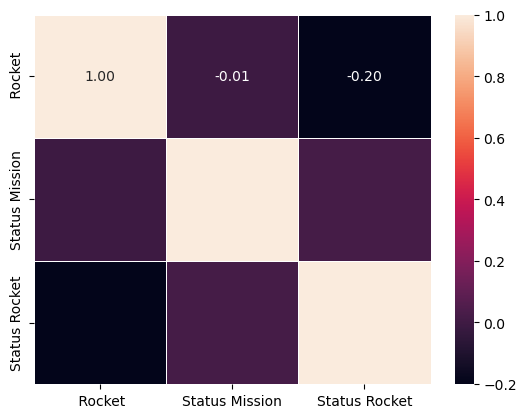

In [478]:
# Sonucu görselleştirerek daha anlaşılabilir bir hale getirelim
sns.heatmap(corr, annot= True, fmt=".2f", linewidths=.7)
plt.show()

- Roket maliyetinin ne görevin başarısı (Status Mission) ne de roketin çalışma durumu (Status Rocket) üzerinde belirgin bir etkisi yok.
- Korelasyon katsayılarının -0.20 ile 0.02 arasında değişmesi, değişkenler arasındaki ilişkilerin çok zayıf olduğunu gösteriyor.
- Bu bulgular, analiz edilen verilerde değişkenler arasında anlamlı bir ilişki olmadığını ortaya koymaktadır.